# <center> Sélection de Modèles et Apprentissage ensembliste</center>

![](https://dezyre.gumlet.io/images/blog/model-selection-in-machine-learning/Model_Evaluation_and_Selection_in_Data_Mining.png)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sélection-de-Modèles" data-toc-modified-id="Sélection-de-Modèles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sélection de Modèles</a></span></li><li><span><a href="#Techniques-d'estimation-des-performances" data-toc-modified-id="Techniques-d'estimation-des-performances-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Techniques d'estimation des performances</a></span></li><li><span><a href="#Métriques-d'évaluation-pour-la-classification" data-toc-modified-id="Métriques-d'évaluation-pour-la-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Métriques d'évaluation pour la classification</a></span></li><li><span><a href="#Classification-sensible-aux-coûts-(traitement-du-déséquilibre)" data-toc-modified-id="Classification-sensible-aux-coûts-(traitement-du-déséquilibre)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification sensible aux coûts (traitement du déséquilibre)</a></span></li><li><span><a href="#Métriques-de-régression" data-toc-modified-id="Métriques-de-régression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Métriques de régression</a></span></li><li><span><a href="#Ajustement-des-hyperparamètres" data-toc-modified-id="Ajustement-des-hyperparamètres-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ajustement des hyperparamètres</a></span></li><li><span><a href="#Résumé" data-toc-modified-id="Résumé-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Résumé</a></span></li><li><span><a href="#Apprentissage-Ensembliste" data-toc-modified-id="Apprentissage-Ensembliste-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Apprentissage Ensembliste</a></span></li><li><span><a href="#Arbres-de-décision-(récapitulation)" data-toc-modified-id="Arbres-de-décision-(récapitulation)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Arbres de décision (récapitulation)</a></span></li><li><span><a href="#Bagging-(Bootstrap-Aggregating)" data-toc-modified-id="Bagging-(Bootstrap-Aggregating)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Bagging (Bootstrap Aggregating)</a></span></li><li><span><a href="#Boosting-adaptatif-(AdaBoost)" data-toc-modified-id="Boosting-adaptatif-(AdaBoost)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Boosting adaptatif (AdaBoost)</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#Statcking" data-toc-modified-id="Statcking-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Statcking</a></span></li><li><span><a href="#Autres-techniques-ensemblistes" data-toc-modified-id="Autres-techniques-ensemblistes-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Autres techniques ensemblistes</a></span></li></ul></div>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Installation automatique lors de l'exécution sur Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/master'):
    !git clone -q https://github.com/ML-course/master.git /content/master
    !pip --quiet install -r /content/master/requirements_colab.txt
    %cd master/notebooks

# Importations et paramètres globaux
%matplotlib inline
from preamble import *
interactive = True # Définir à True pour les tracés interactifs
if interactive:
    fig_scale = 1.5
else: # Pour l'affichage
    fig_scale = 0.3
    plt.rcParams.update(print_config)
    

## Sélection de Modèles

**Puis-je vous faire confiance?**

#### Évaluation

- Pour savoir si nous pouvons faire confiance à notre méthode ou à notre système, nous devons l'évaluer.
- Sélection de modèles : choisir entre différents modèles en fonction des données.
    - Si vous ne pouvez pas le mesurer, vous ne pouvez pas l'améliorer.
- Convaincre les autres que votre travail est utile
    - Les pairs, les dirigeants, les clients, vous-même (!)
- Dans la mesure du possible, essayez d'_interpréter_ ce que votre modèle a appris 
    - Le signal trouvé par votre modèle peut n'être qu'un artefact de vos données biaisées.
    - Voir "Why Should I Trust You ?" par Marco Ribeiro et al.
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/eval_trust.png" alt="ml" style="width : 50% ;"/>

#### Conception de systèmes d'apprentissage automatique

* L'exécution de votre algorithme favori n'est généralement pas une bonne façon de commencer.
* Considérer le problème : Comment mesurer le succès ? Y a-t-il des coûts en jeu ?
    - Voulez-vous comprendre les phénomènes ou faire de la modélisation en boîte noire ?
* Analysez les erreurs de votre modèle. Ne vous contentez pas de peaufiner sans fin.
    - Construisez des prototypes précoces. Devriez-vous collecter davantage de données ou des données supplémentaires ?
    - Faut-il reformuler la tâche ?
* Les systèmes d'apprentissage automatique trop complexes sont difficiles à maintenir.
    - Voir "Apprentissage automatique : La carte de crédit à intérêt élevé de la dette technique".   

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/eval_debt2.png" alt="ml" style="width : 75% ;"/>

## Techniques d'estimation des performances
* Toujours évaluer les modèles _comme s'ils prédisaient des données futures_
* Nous n'avons pas accès aux données futures, nous prétendons donc que certaines données sont cachées.
* Méthode la plus simple : le _holdout_ (simple train-test split)
    - Diviser aléatoirement les données (et les étiquettes correspondantes) en un ensemble de formation et un ensemble de test (par exemple 75%-25%)
    - Former (ajuster) un modèle sur les données d'entraînement, noter sur les données de test.

![](train_test_split.png)

#### Validation croisée K-fold
- Chaque division aléatoire peut produire des modèles (et des scores) très différents.
    - Par exemple, tous les exemples faciles (ou difficiles) peuvent se retrouver dans l'ensemble de test.
- Diviser les données en _k_ parties de taille égale, appelées _folds_.
    - Créer _k_ divisions, en utilisant à chaque fois un fold différent comme ensemble de test
- Calculer _k_ scores d'évaluation, agréger ensuite (par exemple, prendre la moyenne)
- Examiner la variance des scores pour voir à quel point les modèles sont _sensibles_ (instables).
- Un grand _k_ donne de meilleures estimations (plus de données d'entraînement), mais il est coûteux.

![](k_fold.png)

In [31]:
import numpy as np
import pandas as pd 

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
kfold = KFold(n_splits=3)
logistic_regression = LogisticRegression()
cross_val_score(logistic_regression, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

**Pouvez-vous expliquer ce résultat?**

![](kfold3.png)

#### Validation croisée K-Fold stratifiée

- Si les données sont déséquilibrées, certaines classes n'ont que peu d'échantillons.
- Il est probable que certaines classes ne soient pas présentes dans l'ensemble de test. 
- Stratification : Les _proportions_ entre les classes sont conservées dans chaque fold.
    - Ordonner les exemples par classe
    - Séparer les échantillons de chaque classe en _k_ ensembles (strates)
    - Combiner les strates correspondantes en fold

![](strat_kfold.png)

In [32]:
kfold = StratifiedKFold(n_splits=3)
logistic_regression = LogisticRegression()
cross_val_score(logistic_regression, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.98])

#### Validation croisée Leave-One-Out

- Validation croisée _k_ fold avec _k_ égal au nombre d'échantillons
- Totalement impartiale (en termes de répartition des données), mais coûteuse en termes de calcul.
- Généralisation _moins bonne_ pour les données non vues
    - Les ensembles d'entraînement sont corrélés (se chevauchent fortement)
    - Surapprentissage des données utilisées pour l'évaluation (dans son intégralité)
    - Un échantillon différent des données peut donner des résultats différents
- Recommandé uniquement pour les petits ensembles de données

![](leokfold.png)

#### Validation croisée Shuffle-Split
- Mélange les données, échantillonne (`train_size`) des points de façon aléatoire comme ensemble d'entraînement.
- Peut aussi utiliser une taille plus petite (`test_size`), pratique avec les très grands ensembles de données.
- Ne jamais utiliser si les données sont ordonnées (par exemple, séries temporelles).

![](shuffle_split.png)

### Le Bootstrap
- Échantillonner _n_ (taille de l'ensemble de données) points de données, avec remplacement, comme ensemble d'entraînement (le bootstrap).
    - En moyenne, les bootstrap incluent 66 % de tous les points de données (certains sont des doublons).
- Utiliser les échantillons non échantillonnés (hors bootstrap) comme ensemble de test.
- Répéter $k$ fois pour obtenir $k$ scores
- Similaire à Shuffle-Split avec `train_size=0.66`, `test_size=0.34` mais sans doublons

![](bootstrap.png)

### Validation croisée répétée
- La validation croisée est toujours biaisée dans la mesure où la répartition initiale peut être effectuée de plusieurs manières.
- Validation croisée répétée, ou n fois-k-fold :
    - Mélangez les données de manière aléatoire et effectuez une validation croisée k-fold.
    - Répétez n fois, vous obtiendrez n fois k scores.
- Sans biais, très robuste, mais n fois plus coûteux.

![](rep_kfold.png)

#### Validation croisée avec des groupes

- Les données contiennent parfois des groupes inhérents :
    - échantillons multiples d'un même patient, images d'une même personne,...
- Les données d'une même personne peuvent se retrouver dans l'ensemble d'apprentissage _et_ de test
- Nous voulons mesurer le degré de généralisation du modèle à d'autres personnes.
- S'assurer que les données d'une même personne se trouvent _soit_ dans l'ensemble de formation, soit dans l'ensemble de test.
    - C'est ce qu'on appelle le _groupement_ ou le _blocage_.
    - Validation croisée avec un seul sujet : ensemble de test pour chaque sujet/groupe.

![](groupkfold.png)

#### Séries temporelles
Lorsque les données sont ordonnées, les ensembles test aléatoires ne sont pas une bonne idée.

![](time_series.png)

#### Test-then-train (évaluation préquentielle)
* Chaque nouvel échantillon n'est évalué qu'une seule fois, puis ajouté à l'ensemble d'entraînement
    * Peut également être effectué par lots (de _n_ échantillons à la fois) 
* `TimeSeriesSplit`
    * Dans la kème division, les k premiers folds sont l'ensemble train et le (k+1)ème fold est l'ensemble de test
    * Souvent, une taille maximale (ou fenêtre) d'ensemble d'entraînement est utilisée
        * plus robuste contre le concept de drift (changement de données au fil du temps)

![](https://www.researchgate.net/publication/355889701/figure/fig1/AS:1086138706071552@1635967055039/Classical-k-fold-cross-validation-vs-time-series-split-cross-validation.ppm)

#### Choisir une procédure d'estimation des performances
Pas de règles strictes, seulement des lignes directrices :

- Utilisez toujours la stratification pour la classification (sklearn le fait par défaut)
- Utiliser `train_test_split` pour de très grands ensembles de données (par exemple > 1 000 000 d'exemples)
    - Ou lorsque les modèles ne convergent pas toujours (ex : deep learning)
- Choisissez _k_ en fonction de la taille de l'ensemble de données et des ressources
    
    - Utilisez le modèle Leave-One-Out pour les très petits ensembles de données (par exemple <100 exemples)
    - Utiliser la validation croisée sinon
        - Le plus populaire (et théoriquement valable) : CV 10 fois
        - La littérature suggère qu'un CV 5x2 est préférable
- Utilisez le regroupement ou laissez un sujet de côté pour les données groupées
- Utilisez train-then-test pour les séries temporelles

## Métriques d'évaluation pour la classification

### Évaluation vs optimisation

- Chaque algorithme optimise une fonction objective donnée (sur les données d'entraînement)
    - Par exemple. rappelez-vous la perte de L2 dans la régression Ridge
$$\mathcal{L}_{Ridge} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i =0}^{p} w_i^2$$

- Le choix des fonctions est limité par ce qui peut être optimisé efficacement
- Cependant, nous _évaluons_ le modèle résultant avec un score qui a du sens **dans le monde réel**
    - Pourcentage de prédictions correctes (sur un ensemble de test)
    - Le coût réel des erreurs (par exemple en argent, en temps, en vies,...)
- Nous ajustons également les hyperparamètres de l'algorithme pour maximiser (optimiser) ce score

### Classification binaire

- Nous avons une classe positive et une classe négative
- 2 types d'erreurs différents :
    - Faux positif (erreur de type I) : le modèle prédit un résultat positif alors que la vraie étiquette est négative
    - Faux négatif (erreur de type II) : le modèle prédit un résultat négatif alors que la véritable étiquette est positive
- Ils ne sont pas toujours aussi importants
    - De quel côté souhaitez-vous pécher pour un examen médical ?

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/type1error.jpg" alt="ml" style="width : 60%"/>

#### Matrices de confusion
- Nous pouvons représenter toutes les prédictions (correctes et incorrectes) dans une matrice de confusion
    - tableau n par n (n est le nombre de classes)
    - Les lignes correspondent aux vraies classes, les colonnes aux classes prédites
    - Comptez la fréquence à laquelle les échantillons appartenant à une classe C sont classés en C ou dans toute autre classe.
    - Pour la classification binaire, nous étiquetons ces vrais négatifs (TN), vrais positifs (TP), faux négatifs (FN), faux positifs (FP)

| | Négatif prédit | Pos prédit |
|-|-|-|
| Négatif réel | TN | FP |
| Pos réel | FN | TP |

#### Accuracy prédictive

- L'accuracy peut être calculée sur la base de la matrice de confusion
- Pas utile si l'ensemble de données est très déséquilibré
 - Par exemple. Fraude à la carte bancaire : une précision de 99,99 % est-elle suffisante ?

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

- 3 modèles : prédictions très différentes, même accuracy :

![](cm.png)

#### Précision
- À utiliser lorsque l'objectif est de limiter les FP
    - Essais cliniques : vous souhaitez uniquement tester des médicaments qui fonctionnent vraiment 
    - Moteurs de recherche : vous souhaitez éviter les mauvais résultats de recherche

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$


![](ps.png)

#### Recall
- À utiliser lorsque l'objectif est de limiter les FN
     - Diagnostic de cancer : vous ne voulez pas passer à côté d'une maladie grave
     - Moteurs de recherche : vous ne voulez pas omettre les résultats importants
- Également connu sous le nom de sensibilité, taux de réussite, taux de vrais positifs (TPR)

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

![](recall.png)

__Comparaison__   
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/07_precision-recall.jpg" alt="ml" style="width: 50%"/>

#### F1-score
- Compromis entre precision et recall:

$$
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

![](f1.png)

__Classification measure Zoo__   
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/07_zoo.png" alt="ml" style="width: 1500px;"/>

https://en.wikipedia.org/wiki/Precision_and_recall

### Classification multi-classes
- Former des modèles _par classe_ : une classe considérée comme positive, les autres comme étant négatives, puis effectuer la moyenne
 - micro-moyenne : comptez le total des TP, FP, TN, FN (chaque échantillon est également important)
 - micro-précision, micro-recall, micro-F1, accuracy sont toutes identiques
 $$\text{Précision :} \frac{\sum_{c=1}^C\text{TP}_c}{\sum_{c=1}^C\text{TP}_c + \sum_{c=1 }^C\text{FP}_c} \xrightarrow{c=2} \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

 - macro-moyenne : moyenne des scores $R(y_c,\hat{y_c})$ obtenus sur chaque classe
 - Préférable pour les classes déséquilibrées (si toutes les classes sont d'égale importance)
 - le recall macro-moyenné est également appelé _balanced accuracy_
 $$\frac{1}{C} \sum_{c=1}^C R(y_c,\hat{y_c})$$
 - moyenne pondérée ($w_c$ : ratio d'exemples de classe $c$, alias support) : $\sum_{c=1}^C w_c R(y_c,\hat{y_c})$

In [6]:
import numpy as np
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import mode

# chargement des donnees
iris = load_iris()


# validation croisee stratifiee
skfold = StratifiedKFold(n_splits=10)

# listes vides pour stocker les scores
train_accuracies = []
test_accuracies = []

# tableaux vides pour stocker les predictions
test_preds = np.zeros(iris.data.shape[0], )

for fold, (train_index, test_index) in enumerate(skfold.split(iris.data, iris.target)):
    print(f"\n=============Training LogisticRegression on fold {fold+1}: ==================\n")
    
    xtrain = iris.data[train_index]
    xtest = iris.data[test_index]
    
    ytrain = iris.target[train_index]
    ytest = iris.target[test_index]
    
    # instantiation du modele
    logistic_regression = LogisticRegression()
    
    #entrainement du modele
    logistic_regression.fit(xtrain, ytrain)
    
    # predictions
    train_pred = logistic_regression.predict(xtrain)
    test_pred = logistic_regression.predict(xtest)
    
    # affichage des scores
    print(f"Train accuracy on fold {fold+1}: {round(accuracy_score(ytrain, train_pred), 3)}")
    print(f"Test accuracy on fold {fold+1}: {round(accuracy_score(ytest, test_pred), 3)}")
    
    # stockage des scores
    train_accuracies.append(accuracy_score(ytrain, train_pred))
    test_accuracies.append(accuracy_score(ytest, test_pred))
    
    # stockage des predictions
    test_preds[test_index] = test_pred
    
print(f"Average train accuracy on {skfold.get_n_splits()} folds: {round(np.mean(train_accuracies), 3)} avec un écart type: {round(np.std(train_accuracies), 3)}")
print(f"Average test accuracy on {skfold.get_n_splits()} folds: {round(np.mean(test_accuracies), 3)} avec un écart type: {round(np.std(test_accuracies), 3)}")


=============Training LogisticRegression on fold 1: ==================

Train accuracy on fold 1: 0.97
Test accuracy on fold 1: 1.0

=============Training LogisticRegression on fold 2: ==================

Train accuracy on fold 2: 0.978
Test accuracy on fold 2: 0.933

=============Training LogisticRegression on fold 3: ==================

Train accuracy on fold 3: 0.97
Test accuracy on fold 3: 1.0

=============Training LogisticRegression on fold 4: ==================

Train accuracy on fold 4: 0.97
Test accuracy on fold 4: 1.0

=============Training LogisticRegression on fold 5: ==================

Train accuracy on fold 5: 0.978
Test accuracy on fold 5: 0.933

=============Training LogisticRegression on fold 6: ==================

Train accuracy on fold 6: 0.978
Test accuracy on fold 6: 0.933

=============Training LogisticRegression on fold 7: ==================

Train accuracy on fold 7: 0.985
Test accuracy on fold 7: 0.933

=============Training LogisticRegression on fold 8: ====

In [7]:
print(classification_report(iris.target, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [8]:
pd.DataFrame(confusion_matrix(iris.target, test_preds),
             index=pd.MultiIndex.from_product([["Réel"], iris.target_names]),
             columns=pd.MultiIndex.from_product([["Prédit"], iris.target_names]))

Prédit                     
                setosa versicolor virginica
Réel setosa         50          0         0
     versicolor      0         47         3
     virginica       0          1        49

**D'autres métriques de classification**: Kappa de Cohen, MCC, ...

## Classification sensible aux coûts (traitement du déséquilibre)
* Dans le monde réel, différents types d'erreurs de classification peuvent avoir des coûts différents
     - Une mauvaise classification de certaines classes peut être plus coûteuse que d'autres
     - Une mauvaise classification de certains échantillons peut être plus coûteuse que d'autres
* Rééchantillonnage sensible aux coûts : rééchantillonnez (ou repondérez) les données pour représenter les attentes du monde réel
     - suréchantillonner les classes minoritaires (ou sous-échantillonner la majorité) pour « corriger » le déséquilibre
     - augmenter le poids des échantillons mal classés (par exemple en boosting)
     - diminuer le poids des échantillons mal classés (bruyants) (par exemple dans la compression du modèle)

### Pondération des classes
* Si certaines classes sont plus importantes que d'autres, nous pouvons leur donner plus de poids
     * Par exemple. pour les données déséquilibrées, on peut donner plus de poids aux classes minoritaires
* La plupart des modèles de classification peuvent l'inclure dans leur fonction de perte et l'optimiser
     * Par exemple. Régression logistique : ajoutez un poids de classe $w_c$ dans la fonction de perte log
$$\mathcal{L_{log}}(\mathbf{w}) = - \sum_{c=1}^{C} \color{red}{w_c} \sum_{n=1}^{N} p_ {n,c} log(q_{n,c}) $$

![](mweights.png)

## Métriques de régression

Les plus couramment utilisés sont
- erreur quadratique moyenne : $\frac{\sum_{i}(y_{pred_i}-y_{actual_i})^2}{n}$
     - erreur quadratique moyenne (RMSE) souvent utilisée également
- erreur absolue moyenne : $\frac{\sum_{i}|y_{pred_i}-y_{actual_i}|}{n}$
     - Moins sensible aux valeurs aberrantes et aux erreurs importantes

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/distracted_rmse.jpg" alt="ml" style="width: 500px;"/>

### R squared
- $R^2 = 1 - \frac{\color{blue}{\sum_{i}(y_{pred_i}-y_{réel_i})^2}}{\color{red}{\sum_{i}( y_{moyenne}-y_{réel_i})^2}}$
     - Rapport variation expliquée par le modèle / variation totale
     - Entre 0 et 1, mais _négatif_ si le modèle est pire que la simple prédiction de la moyenne
     - Plus facile à interpréter (plus c'est haut, mieux c'est).

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/07_r2.png" alt="ml" style="width : 600px;"/>

Organigramme récapitulatif (par Andrew Ng)

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/03_Bias-Variance-Flowchart.png" alt="ml" style="width : 50%"/>

## Ajustement des hyperparamètres
- Il existe une vaste gamme de techniques pour régler les hyperparamètres. Le plus simple:
     - Recherche par grille (Grid Search) : choisissez une plage de valeurs pour chaque hyperparamètre, essayez chaque combinaison
         - Ne s'adapte pas à de nombreux hyperparamètres (explosion combinatoire)
     - Recherche aléatoire (Random Search) : choisissez des valeurs aléatoires pour tous les hyperparamètres, itérez $n$ fois
         - Mieux, surtout quand certains hyperparamètres sont moins importants
- De nombreuses techniques plus avancées existent, voir la conférence sur Automatic Machine Learning

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/gridvsrandom.png" alt="ml" style="width : 50%"/>

* Tout d'abord, divisez les données en ensembles d'entraînement et de test (séparation externe)
* Divisez à nouveau les données d'entraînement (validation croisée interne)
     * Générer des configurations d'hyperparamètres (par exemple recherche aléatoire/grille)
     * Évaluez toutes les configurations sur tous les splits internes, sélectionnez la meilleure (en moyenne)
* Réentraînez les meilleures configurations sur un ensemble de train complet, évaluer sur les données de test retenues

![](hp_search.png)

### Validation croisée imbriquée
- Approche la plus simple : une seule division externe et une seule division interne (illustrée ci-dessous)
- Risque de sur-ajustement des hyperparamètres sur une répartition train-test spécifique
     - Uniquement recommandé pour les très grands ensembles de données
- Validation croisée imbriquée :
     - Boucle externe : diviser l'ensemble de données complet en fractionnements d'entraînement et de test $k_1$
     - Boucle interne : divisez les données d'entraînement en ensembles de train et de validation $k_2$
- Cela donne $k_1$ scores pour $k_1$ configurations différentes d'hyperparamètres
 - Le score moyen est la performance attendue du modèle optimisé
- Pour utiliser le modèle en pratique, réajustez l'ensemble de données **entier**

```python
hps = {'C' : expon(scale=100), 'gamma' : expon(scale=.1)}
scores = cross_val_score (RandomizedSearchCV (SVC(), hps, cv = 3), X, y, cv = 5)
```

![](sa.png)

In [33]:
from scipy.stats.distributions import expon
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X, y = iris.data, iris.target

# espace d'hyperparametres
hps = {'C' : [1, 10, 20],#expon(scale=100),
       'gamma' : expon(scale=.1)}

In [34]:
svc_model = SVC()
skf = StratifiedKFold(n_splits=3)
random_search = RandomizedSearchCV(estimator=svc_model,
                                  param_distributions=hps,
                                   cv=skf,
                                   n_jobs=-1,
                                   random_state=23, 
                                   return_train_score=True
                                )
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 10, 20],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fee1c7833d0>},
                   random_state=23, return_train_score=True)

In [35]:
random_search.best_estimator_

SVC(C=20, gamma=0.01828887613441137)

In [36]:
random_search_results = pd.DataFrame(random_search.cv_results_)

In [38]:
random_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,...,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.23e-03,1.50e-04,6.11e-04,8.94e-06,...,0.99,0.99,0.98,1.41e-02
1,1.07e-03,1.56e-04,5.53e-04,7.71e-05,...,0.99,0.99,0.98,1.41e-02
2,9.42e-04,1.34e-04,5.33e-04,1.07e-04,...,0.99,0.99,0.99,4.71e-03
3,8.11e-04,1.70e-05,5.18e-04,2.55e-05,...,0.99,0.99,0.99,4.71e-03
4,9.30e-04,2.22e-04,5.13e-04,4.54e-05,...,0.99,1.00,0.99,8.16e-03
5,1.00e-03,1.29e-04,6.02e-04,4.35e-05,...,0.98,0.97,0.97,4.71e-03
6,8.26e-04,3.76e-05,5.52e-04,8.91e-05,...,0.99,0.98,0.98,1.25e-02
7,1.57e-03,1.20e-04,7.61e-04,7.15e-05,...,0.34,0.34,0.34,0.00e+00
8,8.77e-04,1.71e-04,4.93e-04,7.08e-05,...,0.99,0.99,0.98,9.43e-03
9,7.18e-04,1.14e-04,4.73e-04,6.39e-05,...,0.99,0.99,0.98,1.41e-02


In [37]:
random_search_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [39]:
random_search_results[["param_C", "param_gamma", 
                       "mean_train_score", "mean_test_score", "std_test_score"]].sort_values("mean_test_score")

,param_C,param_gamma,mean_train_score,mean_test_score,std_test_score
7,1,0.0,0.34,0.32,0.00e+00
5,1,0.05,0.97,0.96,1.63e-02
0,20,0.29,0.98,0.97,1.89e-02
1,20,0.15,0.98,0.97,9.43e-03
6,10,0.22,0.98,0.98,0.00e+00
2,10,0.02,0.99,0.98,1.63e-02
9,20,0.11,0.98,0.98,0.00e+00
8,10,0.09,0.98,0.98,1.63e-02
4,20,0.02,0.99,0.99,1.89e-02
3,20,0.02,0.99,0.99,1.89e-02


## Résumé
* Divisez les données en ensembles de train et de test en fonction de l'application
    * Holdout uniquement pour les grands ensembles de données, validation croisée pour les plus petits
    * Pour la classification, utilisez toujours la stratification
    * Les données groupées ou ordonnées nécessitent un fractionnement spécial
* Choisissez une métrique qui correspond à votre application
    * Par exemple. précision pour éviter les faux positifs, recall pour éviter les faux négatifs
* Calibrez le seuil de décision pour l'adapter à votre application
    * Les courbes ROC (TPR en fonction de FPR) ou les courbes Precision-Recall peuvent aider à trouver un bon compromis
* Si possible, incluez les coûts réels ou relatifs des erreurs de classification.
    * La pondération des classes, la pondération des instances et les isométries ROC peuvent aider
    * Soyez prudent avec les ensembles de données déséquilibrés ou non représentatifs
* Lors de l'utilisation des probabilités prédites dans les applications, calibrez les modèles
* Ajustez toujours les hyperparamètres les plus importants
    * Réglage manuel : utilisez les informations et les résultats des tests d'entraînement pour vous guider
    * Optimisation des hyperparamètres : veillez à ne pas trop ajuster

## Apprentissage Ensembliste

![](https://geekflare.com/fr/wp-content/uploads/2023/04/stacking.png)

### Apprentissage d'ensemble
* Si différents modèles font des erreurs différentes, pouvons-nous simplement faire la moyenne des prédictions ?
* Classificateur de vote : donne à chaque modèle un _vote_ sur l'étiquette de classe
     * Vote dur : la classe majoritaire gagne (l'ordre des classes brise les égalités)
     * Vote doux : somme des probabilités de classe $p_{m,c}$ sur les modèles $M$ : $\underset{c}{\operatorname{argmax}} \sum_{m=1}^{M} w_c p_{m, c}$
     * Les classes peuvent avoir des poids différents $w_c$ (par défaut : $w_c=1$)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Toy data
X, y = make_moons(noise=.2, random_state=18) # carefully picked random state for illustration
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Plot grid
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
models = [LogisticRegression(C=100),
          DecisionTreeClassifier(max_depth=3, random_state=0),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=30)]

@interact
def combine_voters(model1=models, model2=models):
    # Voting Classifier and components
    voting = VotingClassifier([('model1', model1),('model2', model2)],voting='soft')
    voting.fit(X_train, y_train)

    # transform produces individual probabilities
    y_probs =  voting.transform(X_grid)

    fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(11*fig_scale, 3*fig_scale))
    scores = [voting.estimators_[0].score(X_test, y_test),
             voting.estimators_[1].score(X_test, y_test),
             voting.score(X_test, y_test)]
    titles = [model1.__class__.__name__, model2.__class__.__name__, 'VotingClassifier']
    for prob, score, title, ax in zip([y_probs[:, 1], y_probs[:, 3], y_probs[:, 1::2].sum(axis=1)], scores, titles, axes.ravel()):
        ax.contourf(x_grid, y_grid, prob.reshape(x_grid.shape), alpha=.4, cmap='bwr')
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=7*fig_scale)
        ax.set_title(title + f" \n acc={score:.2f}", pad=0, fontsize=9)

interactive(children=(Dropdown(description='model1', options=(LogisticRegression(C=100), DecisionTreeClassifie…

* Pourquoi cela fonctionne-t-il ?
    * Différents modèles peuvent être bons pour différentes "parties" des données (même s'ils ont sous appris).
    * Les erreurs individuelles peuvent être "moyennées" (en particulier si les modèles ont sur appris:).
* Quels sont les modèles à combiner ?
* L'analyse biais-variance nous apprend que nous avons deux options :
    * Si le modèle a sous-appris (biais élevé, variance faible) : combiner avec d'autres modèles à faible variance.
        * Si le modèle ne convient pas (biais élevé, faible variance) : le combiner avec d'autres modèles à faible variance.
        * Réduction du biais. Peut être fait avec **_Boosting_**
    * Si le modèle s'adapte trop (faible biais, variance élevée) : combiner avec d'autres modèles à faible biais.
        * Nécessité d'être différent : les erreurs individuelles doivent être différentes
        * Réduction de la variance. Réduction de la variance. Peut être réalisée avec **_Bagging_**
* Les modèles doivent être non corrélés mais suffisamment bons (sinon l'ensemble est moins bon).
* Nous pouvons également _apprendre_ à combiner les prédictions de différents modèles : **_Stacking_**

## Arbres de décision (récapitulation)
* Représentation : Arbre qui divise les points de données en feuilles sur la base de tests
* Évaluation (perte) : Heuristique pour la pureté des feuilles (indice de Gini, entropie,...)
* Optimisation : Recherche récursive, heuristique et avide (algorithme de Hunt)
    * Considérer toutes les séparations (seuils) entre les points de données adjacents, pour chaque caractéristique
    * Choisir celui qui produit les feuilles les plus pures, répéter.

In [16]:
import graphviz

@interact
def plot_depth(depth=(1,5,1)):
    X, y = make_moons(noise=.2, random_state=18) # carefully picked random state for illustration
    fig, ax = plt.subplots(1, 2, figsize=(12*fig_scale, 4*fig_scale),
                           subplot_kw={'xticks': (), 'yticks': ()})

    tree = mglearn.plots.plot_tree(X, y, max_depth=depth)
    ax[0].imshow(mglearn.plots.tree_image(tree))
    ax[0].set_axis_off()

interactive(children=(IntSlider(value=3, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

### Arbres de régression
* Chaque feuille prédit la valeur cible _moyenne $\mu$ de tous les points de cette feuille.
* Choisir la division qui minimise l'erreur quadratique des feuilles : $\sum_{x_{i} \in L} (y_i - \mu)^2$
* Produit des prédictions pas à pas non lisses, ne peut pas extrapoler.

- **En pratique**: utiliser `DecisionTreeRegressor` de `sklearn.tree`

### Arbres de classification: Importance des caractéristiques basée sur l'impureté/l'entropie
* Nous pouvons mesurer l'importance des caractéristiques (pour le modèle) en fonction des éléments suivants 
    - Les caractéristiques sur lesquelles nous effectuons la séparation
    - la hauteur de la division dans l'arbre (les premières divisions sont plus importantes)

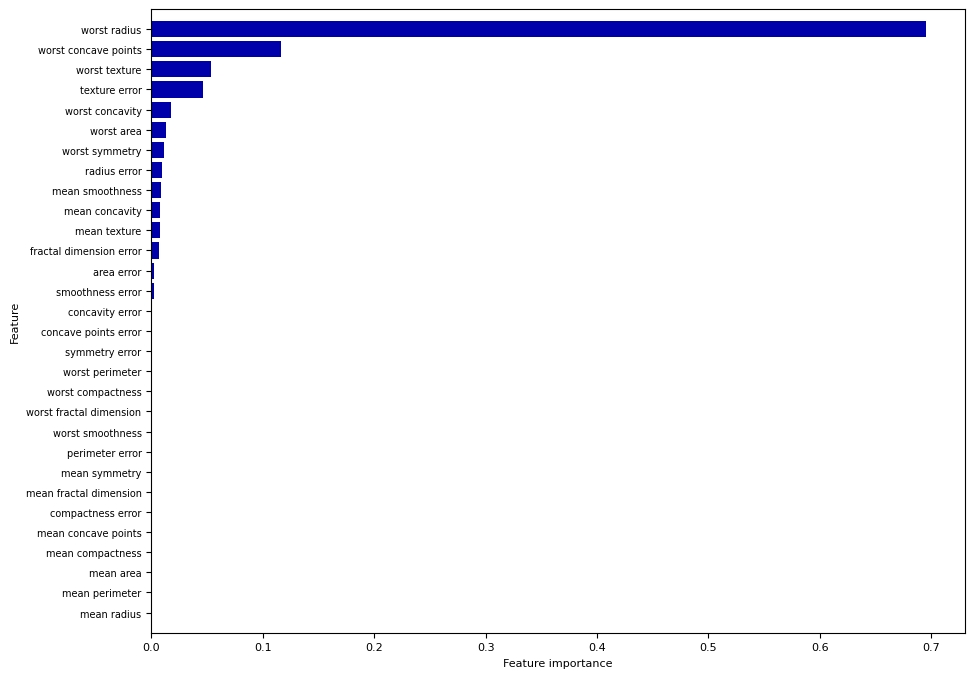

In [17]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(Xc_train, yc_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(7*fig_scale,5.4*fig_scale))
    results = pd.DataFrame({"Feature": cancer.feature_names, 
                  "Importance": model.feature_importances_}).sort_values("Importance", ascending=True)
    plt.barh(range(n_features), results.Importance, align='center')
    plt.yticks(np.arange(n_features), results.Feature, fontsize=7)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

### Sous-apprentissage et surapprentissage
* Nous pouvons facilement contrôler la profondeur (maximale) des arbres en tant qu'hyperparamètre.
* Analyse biais-variance :
    * Les arbres peu profonds ont un biais élevé mais une variance très faible (sous-apprentissage).
    * Les arbres profonds ont une variance élevée mais un faible biais (surapprentissage).
* Parce que nous pouvons facilement contrôler leur complexité, ils sont idéaux pour concevoir des modeles ensemblistes
    * Arbres profonds : conservent un faible biais, réduisent la variance avec **_Bagging_**.
    * Arbres peu profonds : conservent une faible variance, réduisent le biais avec **_Boosting_**.

![](bv.png)

## Bagging (Bootstrap Aggregating)

* Obtenir différents modèles en entraînant le _même_ modèle sur _différents échantillons d'entraînement_.
    * Réduire le surajustement en calculant la moyenne des prédictions individuelles (réduction de la variance)
* En pratique : prenez $I$ échantillons bootstrap de vos données, entraînez un modèle sur chaque bootstrap.
   * Plus $I$ est élevé, plus il y a de modèles, plus le lissage est important (mais l'apprentissage et la prédiction sont plus lents).    
* Les modèles de base doivent être instables : des échantillons de formation différents produisent des modèles différents.
    Les modèles de base doivent être instables : différents échantillons d'apprentissage produisent différents modèles 
    * Par exemple, arbres de décision très profonds, ou même arbres de décision aléatoires 
    * Les réseaux neuronaux profonds peuvent également bénéficier du bagging (ensembles profonds).
* Prédiction par calcul de la moyenne des prédictions des modèles de base
    * Vote souple pour la classification (éventuellement pondéré)
    * Valeur moyenne pour la régression
* Peut également produire des estimations d'incertitude
    * En combinant les probabilités de classe des modèles individuels (ou les variances pour la régression) 

### Forêts aléatoires (Random Forests)
* Utilise des _arbres aléatoires_ pour rendre les modèles encore moins corrélés (plus instables).
    * A chaque division, seules les caractéristiques `max_features` sont prises en compte, sélectionnées aléatoirement.
* Arbres extrêmement aléatoires : considèrent 1 seuil aléatoire pour un ensemble aléatoire de caractéristiques (plus rapide)

In [18]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

models=[RandomForestClassifier(n_estimators=5, random_state=7, n_jobs=-1),ExtraTreesClassifier(n_estimators=5, random_state=2, n_jobs=-1)]

@interact
def run_forest_run(model=models):
    forest = model.fit(X_train, y_train) 
    fig, axes = plt.subplots(2, 3, figsize=(12*fig_scale, 6*fig_scale))
    for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
        ax.set_title("Tree {}".format(i), pad=0, fontsize=9)
        mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
    axes[-1, -1].set_title(model.__class__.__name__, pad=0, fontsize=9)
    axes[-1, -1].set_xticks(())
    axes[-1, -1].set_yticks(())
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, s=10*fig_scale);

interactive(children=(Dropdown(description='model', options=(RandomForestClassifier(n_estimators=5, n_jobs=-1,…

### Effet sur le biais et la variance

- Augmenter le nombre de modeles (arbres) reduit la variance (moins de surapprentissage)
- Principalement aucun effet sur le biais, mais augmentera si la foret devient trop large (surlissage)

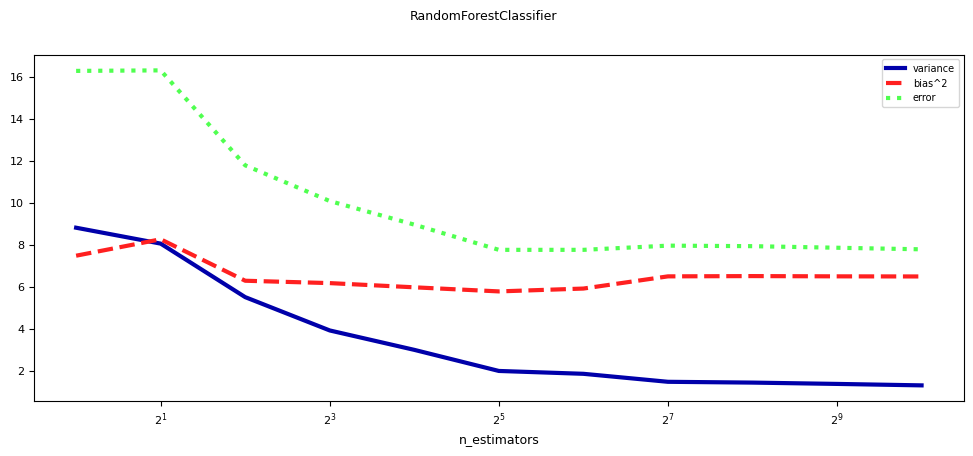

In [19]:
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()

# Faster version of plot_bias_variance that uses warm-starting
def plot_bias_variance_rf(model, X, y, warm_start=False):
    bias_scores = []
    var_scores = []
    err_scores = []

    # Bootstraps
    n_repeat = 40 # 40 is on the low side to get a good estimate. 100 is better.
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat, random_state=0)
    
    # Ensemble sizes
    n_estimators = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    # Store sample predictions. One per n_estimators
    # n_estimators : [predictions]
    predictions = {}
    for nr_trees in n_estimators:
        predictions[nr_trees] = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
                
        # Initialize 
        clf = model(random_state=0)
        if model.__class__.__name__ == 'RandomForestClassifier':
            clf.n_jobs = -1
        if model.__class__.__name__ != 'AdaBoostClassifier':
            clf.warm_start = warm_start
        
        prev_n_estimators = 0
    
        # Train incrementally        
        for nr_trees in n_estimators:
            if model.__class__.__name__ == 'HistGradientBoostingClassifier':
                clf.max_iter = nr_trees
            else:
                clf.n_estimators = nr_trees
            
            # Fit and predict
            clf.fit(X[train_index], y[train_index])
            y_pred = clf.predict(X[test_index])
            for j,index in enumerate(test_index):
                predictions[nr_trees][index].append(y_pred[j])
    
    for nr_trees in n_estimators:
        # Compute bias, variance, error
        bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
                       for i,x in enumerate(predictions[nr_trees])])
        var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat 
                   for i,x in enumerate(predictions[nr_trees])])
        error = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat
                     for i,x in enumerate(predictions[nr_trees])])

        bias_scores.append(bias_sq)
        var_scores.append(var)
        err_scores.append(error)

    plt.figure(figsize=(8*fig_scale,3*fig_scale))
    plt.suptitle(clf.__class__.__name__, fontsize=9)
    plt.plot(n_estimators, var_scores,label = "variance", lw=2*fig_scale )
    plt.plot(n_estimators, bias_scores,label = "bias^2", lw=2*fig_scale )
    plt.plot(n_estimators, err_scores,label = "error", lw=2*fig_scale  )
    plt.xscale('log',base=2)
    plt.xlabel("n_estimators", fontsize=9)
    plt.legend(loc="best", fontsize=7)
    plt.show()
    
plot_bias_variance_rf(RandomForestClassifier, cancer.data, cancer.target, warm_start=True)

#### En pratique

* Différentes implémentations peuvent être utilisées. Par exemple. dans scikit-learn :
     * `BaggingClassifier` : choisissez votre propre modèle de base et votre propre procédure d'échantillonnage
     * `RandomForestClassifier` : implémentation par défaut, nombreuses options
     * `ExtraTreesClassifier` : utilise des arbres extrêmement aléatoires

* Paramètres les plus importants :
     * `n_estimators` (>100, plus c'est mieux, mais rendements décroissants)
         * Commencera à être sous-entraine (la composante d'erreur de biais augmente légèrement)
     * `max_features`
         * Valeurs par défaut : $sqrt(p)$ pour la classification, $log2(p)$ pour la régression
         * Réglez avec des valeurs plus petites pour réduire les besoins en espace/temps
     * paramètres des arbres, par ex. `max_depth`, `min_samples_split`,...
         * La pré-elagage (prepruning) est utile pour réduire la taille du modèle, mais n'en faites pas trop

    * Facile à paralléliser (définissez `n_jobs` sur -1)
    * Fixez `random_state` (échantillons d'amorçage) pour la reproductibilité

### Erreur Out-of-bag
* RandomForests n'a pas besoin de validation croisée : vous pouvez utiliser l'erreur hors sac (OOB)
* Pour chaque arbre cultivé, environ 33 % des échantillons sont hors sac (OOB)
     - N'oubliez pas quels sont les échantillons OOB pour chaque modèle, effectuez du voting sur eux
* Les estimations d'erreur OOB sont idéales pour accélérer la sélection du modèle
     - Aussi bon que les estimations du CV, bien que légèrement pessimistes
* Dans scikit-learn : `oob_error = 1 - clf.oob_score_`

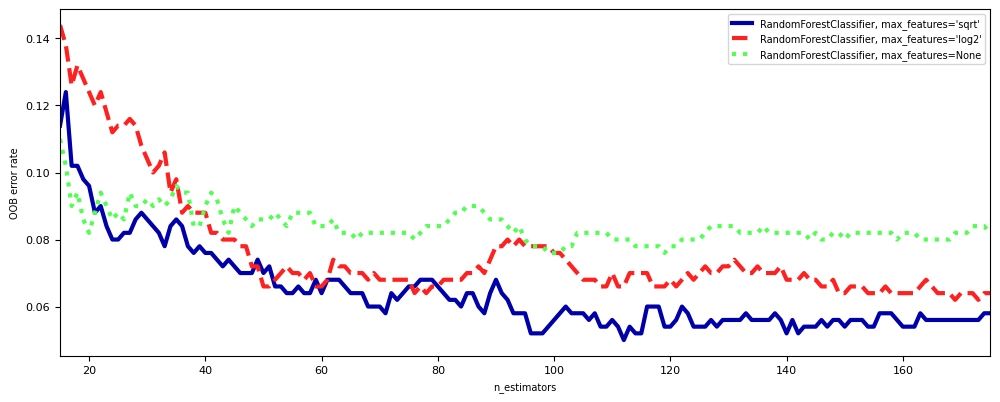

In [20]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", n_jobs=-1,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, n_jobs=-1,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, n_jobs=-1,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(8*fig_scale,3*fig_scale))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label, lw=2*fig_scale)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators", fontsize=7)
plt.ylabel("OOB error rate", fontsize=7)
plt.legend(loc="upper right", fontsize=7)
plt.show()

### Importance des variables
* RandomForests fournit des importances de variables plus fiables, basées sur de nombreuses hypothèses alternatives (arbres)

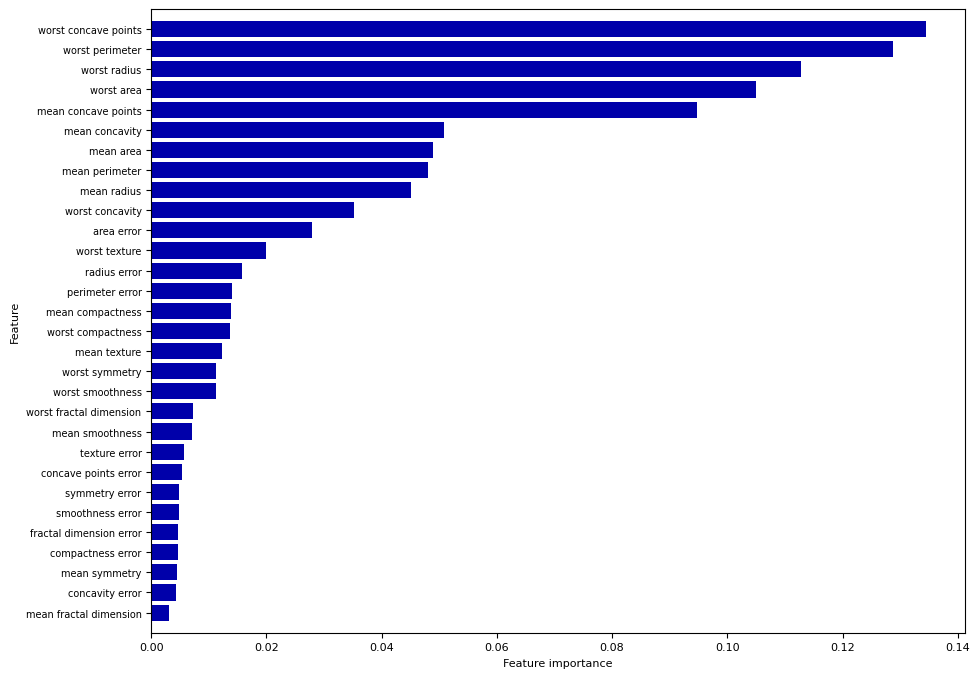

In [21]:
forest = RandomForestClassifier(random_state=0, n_estimators=512, n_jobs=-1)
forest.fit(Xc_train, yc_train)
plot_feature_importances_cancer(forest)

### Autres conseils
* Calibrage du modèle
     * Les RandomForests sont mal calibrées.
     * Calibrez ensuite (par exemple régression isotonique) si vous souhaitez utiliser des probabilités
* Démarrage à chaud (Warm starting)
     * Étant donné un ensemble entraîné pour les itérations $I$, vous pouvez simplement ajouter d'autres modèles plus tard.
     * Vous _démarrez à chaud_ à partir du modèle existant au lieu de recommencer à zéro
     * Peut être utile pour former des modèles sur de nouvelles données étroitement liées
     * Pas idéal si les lots de données changent au fil du temps (concept du drift)
     * Le boosting est plus robuste contre cela (voir plus tard)

### Forces et faiblesses

* RandomForest fait partie des algorithmes les plus utilisés :
     * Ne nécessite pas beaucoup de réglages
     * Généralement très précis
     * Gère bien les fonctionnalités hétérogènes (arbres)
     * Sélectionne implicitement les fonctionnalités les plus pertinentes
* Inconvénients :
     * moins interprétable, plus lent à entraîner (mais parallélisable)
     * ne fonctionne pas bien sur des données clairsemées de grande dimension (par exemple du texte)

## Boosting adaptatif (AdaBoost)

* Obtenir des modèles différents en _repondérant_ les données d'entraînement à chaque itération
    * Réduire le sous-apprentissage en se concentrant sur les exemples d'entraînement "difficiles"
    * Augmenter les poids des instances mal classées par l'ensemble et vice versa
* Augmenter les poids des instances mal classées par l'ensemble, et vice versa.
* Les modèles de base doivent être simples, de sorte que des poids d'instance différents conduisent à des modèles différents.
    * Modèles sous-entraines : souches de décision (ou arbres très peu profonds)
    * Chaque modèle est un "expert" pour certaines parties des données.
* Modèle additif : Les prédictions à l'itération $I$ sont la somme des prédictions du modèle de base.
    * Dans Adaboost, les modèles reçoivent chacun un poids unique $w_i$.
$$f_I(\mathbf{x}) = \sum_{i=1}^I w_i g_i(\mathbf{x})$$

* Adaboost minimise la perte exponentielle. Pour l'erreur pondérée par instance $\varepsilon$ :
$$\mathcal{L}_{Exp} = \sum_{n=1}^N e^{\varepsilon(f_I(\mathbf{x}))}$$.
* En dérivant $\frac{\partial \mathcal{L}}{\partial w_i}$ vous pouvez trouver que l'optimum $w_{i} = \frac{1}{2}\log(\frac{1-\varepsilon}{\varepsilon})$

### Algorithme AdaBoost
* Initialiser les poids d'échantillonnage : $s_{n,0} = \frac{1}{N}$
* Construire un modèle (par exemple, des souches de décision) en utilisant ces poids d'échantillonnage
* Donner au _modèle_ un poids $w_i$ lié à son taux d'erreur pondéré $\varepsilon$
$$w_{i} = \lambda\log(\frac{1-\varepsilon}{\varepsilon})$$
     * Les bons arbres ont plus de poids que les mauvais arbres
     * La fonction Logit fait correspondre l'erreur $\varepsilon$ de [0,1] au poids dans [-Inf,Inf] (utilisez une petite erreur minimale)
     * Le taux d'apprentissage $\lambda$ (rétrécissement) diminue l'impact des classificateurs individuels
         * Les petites mises à jour sont souvent meilleures mais nécessitent plus d'itérations
* Mettre à jour les poids des échantillons
     * Augmenter le poids des échantillons mal prédits :
$s_{n,i+1} = s_{n,i}e^{w_i}$
     * Diminuer le poids des échantillons correctement prédits :
$s_{n,i+1} = s_{n,i}e^{-w_i}$
     * Normaliser les poids pour ajouter jusqu'à 1
* Répétez pour les itérations $I$

### Variantes d'AdaBoost
* Adaboost discret : le taux d'erreur $\varepsilon$ est simplement le taux d'erreur (1-Précision)
* Real Adaboost : $\varepsilon$ est basé sur les probabilités de classe prédites $\hat{p}_c$ (mieux)
* AdaBoost pour la régression : $\varepsilon$ est soit linéaire ($|y_i-\hat{y}_i|$), carré ($(y_i-\hat{y}_i)^2$), ou perte exponentielle
* GentleBoost : ajoute une limite aux poids des modèles $w_i$
* LogitBoost : minimise les pertes logistiques au lieu des pertes exponentielles
$$\mathcal{L}_{Logistique} = \sum_{n=1}^N log(1+e^{\varepsilon(f_I(\mathbf{x}))})$$

### Adaboost en action
* La taille des échantillons représente le poids de l'échantillon
* L'arrière-plan montre les prédictions du dernier arbre

In [22]:
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.preprocessing import normalize

# Code adapted from https://xavierbourretsicotte.github.io/AdaBoost.html
def AdaBoost_scratch(X,y, M=10, learning_rate = 0.5):
    #Initialization of utility variables
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [],[],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M
    for m in range(M):   

        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)

        #Estimator error
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        
        #Boost estimator weights
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        #Boost sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))
        sample_weight *= np.exp(-estimator_weight * np.invert(incorrect * ((sample_weight > 0) | (estimator_weight < 0))))
        sample_weight /= np.linalg.norm(sample_weight)
        
        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        
    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    #Predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    #print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list, estimator_error_list

def plot_decision_boundary(classifier, X, y, N = 10, scatter_weights = np.ones(len(y)) , ax = None, title=None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

    # Get current axis and plot
    if ax is None:
        ax = plt.gca()
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 1000, edgecolors='none')
    ax.set_xticks(())
    ax.set_yticks(())
    if title:
        ax.set_title(title, pad=1)
    
    # Plot classifier background
    if classifier is not None:
        xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))
        
        #Check what methods are available
        if hasattr(classifier, "decision_function"):
            zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
        elif hasattr(classifier, "predict_proba"):
            zz = np.array( [classifier.predict_proba(np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
        else:
            zz = np.array( [classifier(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )

        # reshape result and plot
        Z = zz.reshape(xx.shape)
    
        ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5, levels=[0,0.5,1])
        #ax.contour(xx, yy, Z, 2, cmap='RdBu', levels=[0,0.5,1])


from sklearn.datasets import make_circles
Xa, ya = make_circles(n_samples=400, noise=0.15, factor=0.5, random_state=1)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

estimator_list, estimator_weight_list, sample_weight_list, estimator_error_list = AdaBoost_scratch(Xa, ya, M=60, learning_rate = 0.5)
current_ax = None
weight_scale = 1

@interact
def plot_adaboost(iteration=(0,60,1)):
    if iteration == 0:
        s_weights = (sample_weight_list[0,:] / sample_weight_list[0,:].sum() ) * weight_scale
        plot_decision_boundary(None, Xa, ya, N = 20, scatter_weights =s_weights)
    else:
        s_weights = (sample_weight_list[iteration,:] / sample_weight_list[iteration,:].sum() ) * weight_scale
        title = "Base model {}, error: {:.2f}, weight: {:.2f}".format(
            iteration,estimator_error_list[iteration-1],estimator_weight_list[iteration-1])
        plot_decision_boundary(estimator_list[iteration-1], Xa, ya, N = 20, scatter_weights =s_weights, ax=current_ax, title=title )
        

interactive(children=(IntSlider(value=30, description='iteration', max=60), Output()), _dom_classes=('widget-i…

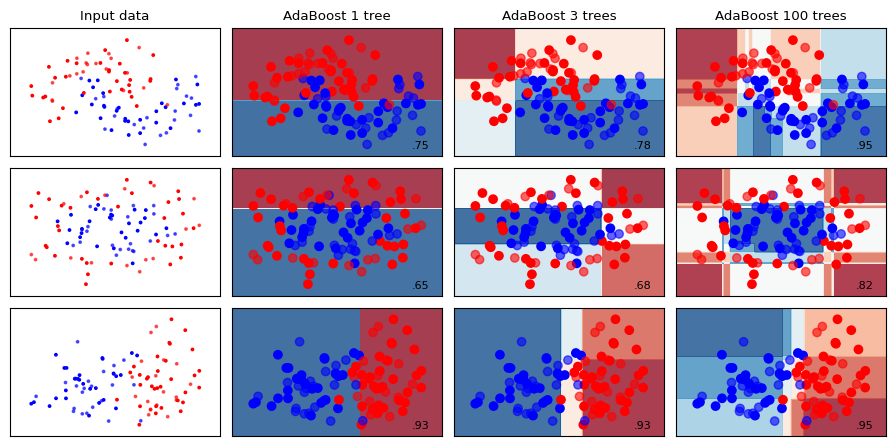

In [23]:
from sklearn.ensemble import AdaBoostClassifier
names = ["AdaBoost 1 tree", "AdaBoost 3 trees", "AdaBoost 100 trees"]

classifiers = [
    AdaBoostClassifier(n_estimators=1, random_state=0, learning_rate=0.5),
    AdaBoostClassifier(n_estimators=3, random_state=0, learning_rate=0.5),
    AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.5)
    ]

mglearn.plots.plot_classifiers(names, classifiers, figuresize=(6*fig_scale,3*fig_scale))  

### Analyse biais-variance
* AdaBoost réduit le biais (et un peu la variance)
    * Le boosting est une technique de _réduction du biais_.
Le boosting est une technique de _réduction des biais_ 
* Un boosting trop important augmentera éventuellement la variance

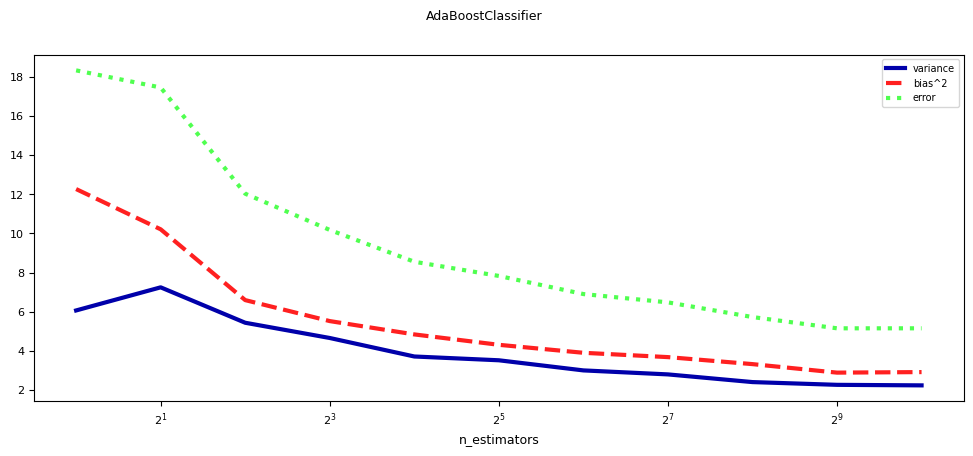

In [24]:
plot_bias_variance_rf(AdaBoostClassifier, cancer.data, cancer.target, warm_start=False)

## Gradient Boosting
* Ensemble de modèles, chacun corrigeant les erreurs restantes des précédents
     * À chaque itération, la tâche est de prédire l'_erreur résiduelle_ de l'ensemble
* Modèle additif : les prédictions à l'itération $I$ sont la somme des prédictions du modèle de base
     * Taux d'apprentissage (ou _shrinkage_ ) $\eta$ : les petites mises à jour fonctionnent mieux (réduit la variance)
$$f_I(\mathbf{x}) = g_0(\mathbf{x}) + \sum_{i=1}^I \eta \cdot g_i(\mathbf{x}) = f_{I-1}(\ mathbf{x}) + \eta \cdot g_I(\mathbf{x})$$
* Les _pseudo-résiduels_ $r_i$ sont calculés selon une fonction de perte différentiable
     * Par exemple. perte des moindres carrés pour la régression et perte du log pour la classification
     * Descente de gradient : les _prédictions_ sont mises à jour étape par étape jusqu'à convergence
$$g_i(\mathbf{x}) \approx r_{i} = - \frac{\partial \mathcal{L}(y_i,f_{i-1}(x_i))}{\partial f_{i-1 }(x_i)}$$
* Les modèles de base $g_i$ doivent avoir une faible variance, mais suffisamment flexibles pour prédire avec précision les résidus.
     * Par exemple. arbres de décision de profondeur 2-5

### Arbres de Boosting du Gradient (Régression)

* Les modèles de base sont des arbres de régression, la fonction de perte est la perte carrée : $\mathcal{L} = \frac{1}{2}(y_i - \hat{y}_i)^2$.
* Les pseudo-résidus sont simplement les erreurs de prédiction pour chaque échantillon :
$$r_i = -\frac{\partial \mathcal{L}}{\partial \hat{y}} = -2 * \frac{1}{2}(y_i - \hat{y}_i) * (-1) = y_i - \hat{y}_i$$.
* Le modèle initial $g_0$ prédit simplement la moyenne de $y$.
* Pour l'itération $m=1..M$ :
    * Pour tous les échantillons i=1..n, calculer les pseudo-résidus $r_i = y_i - \hat{y}_i$.
    * Ajuster un nouveau modèle d'arbre de régression $g_m(\mathbf{x})$ à $r_{i}$.
        * Dans $g_m(\mathbf{x})$, chaque feuille prédit la moyenne de toutes ses valeurs.
    * Mise à jour des prédictions d'ensemble $\hat{y} = g_0(\mathbf{x}) + \sum_{m=1}^M \eta \cdot g_m(\mathbf{x})$

* Arrêt anticipé (Early stopping, optionnel) : arrêt lorsque la performance sur l'ensemble de validation ne s'améliore pas pour $nr$ itérations

#### Régression de boosting du gradient en action
* Les résidus tombent rapidement à (presque) zéro

interactive(children=(IntSlider(value=30, description='step', max=60), Output()), _dom_classes=('widget-intera…

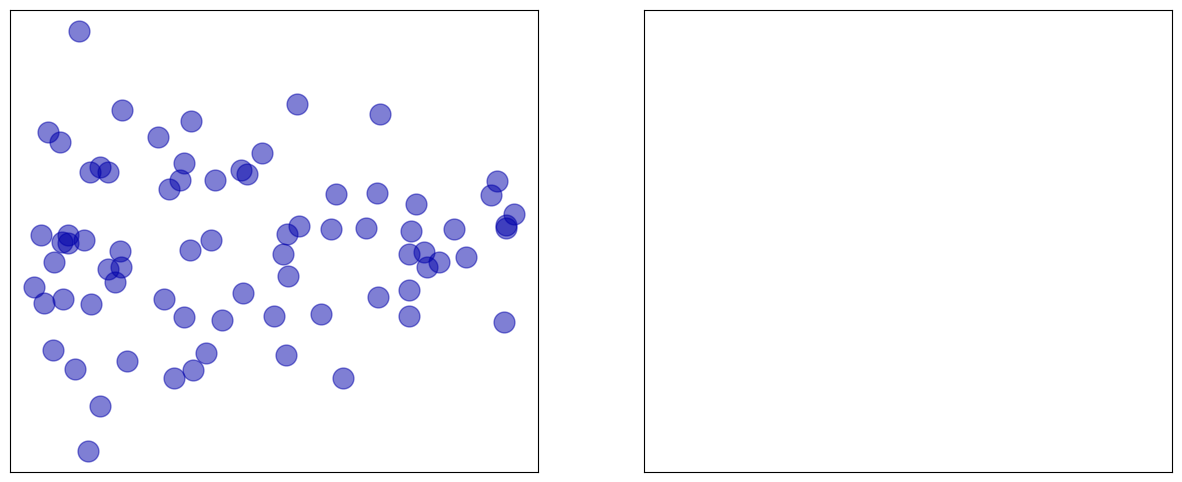

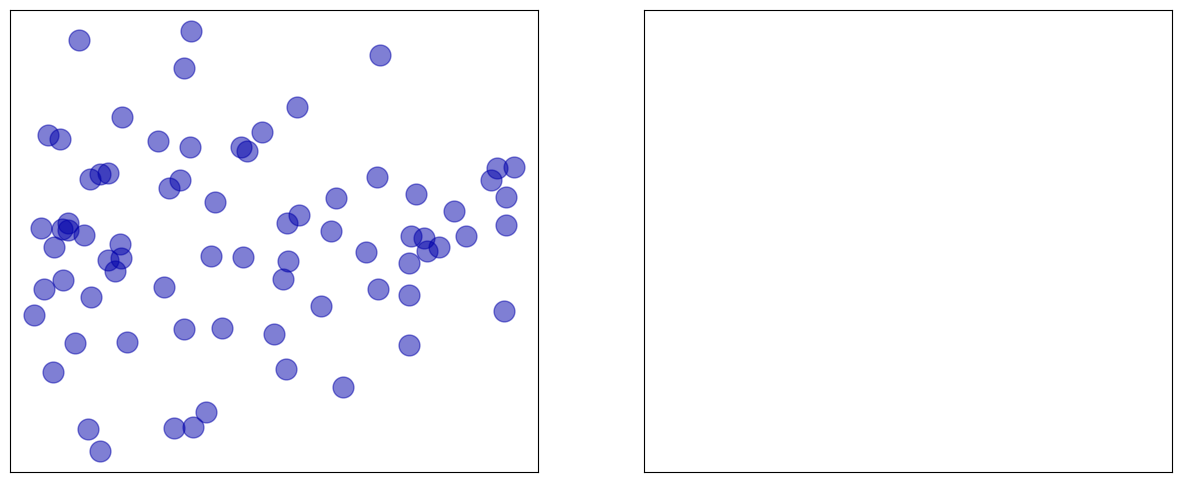

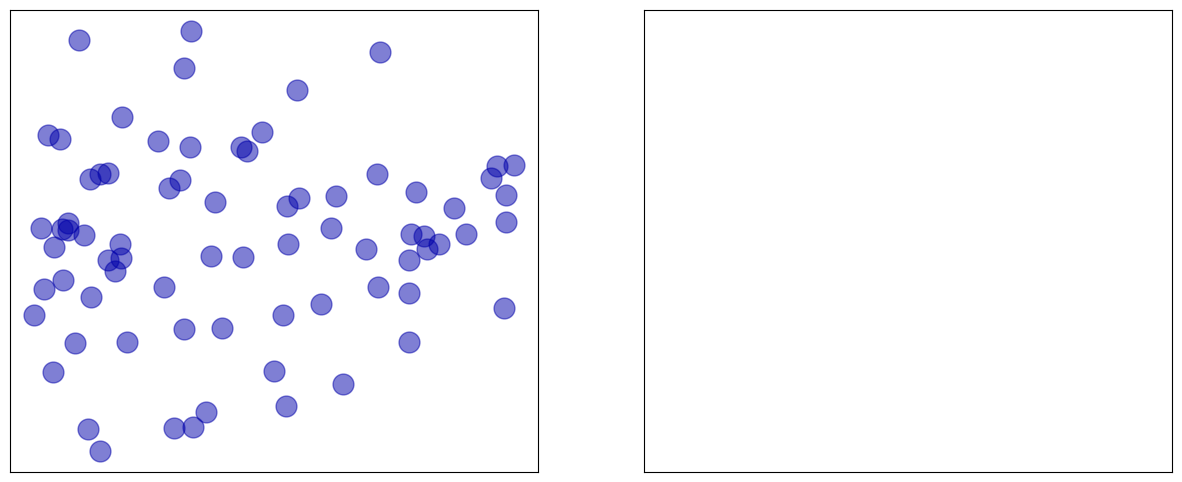

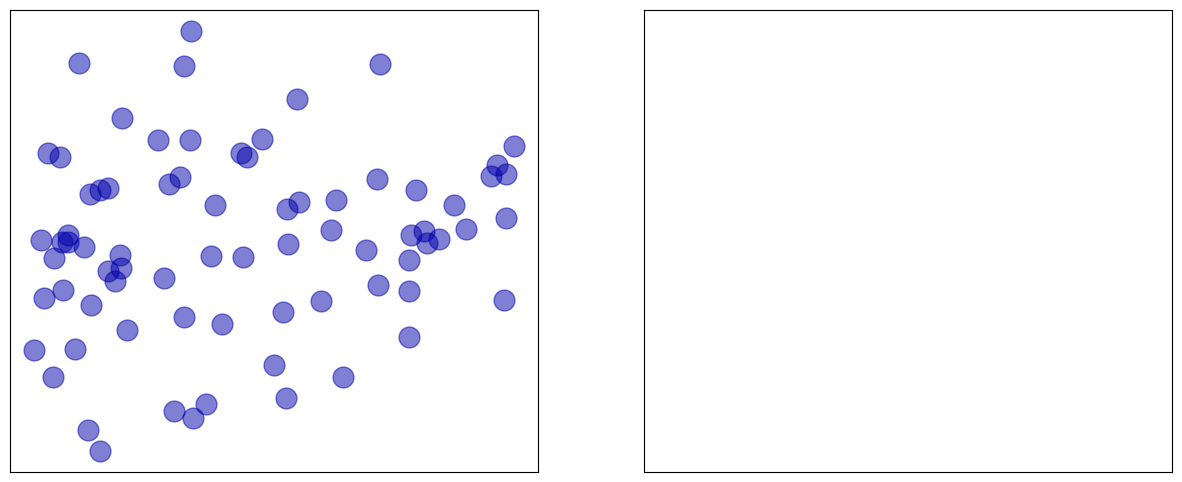

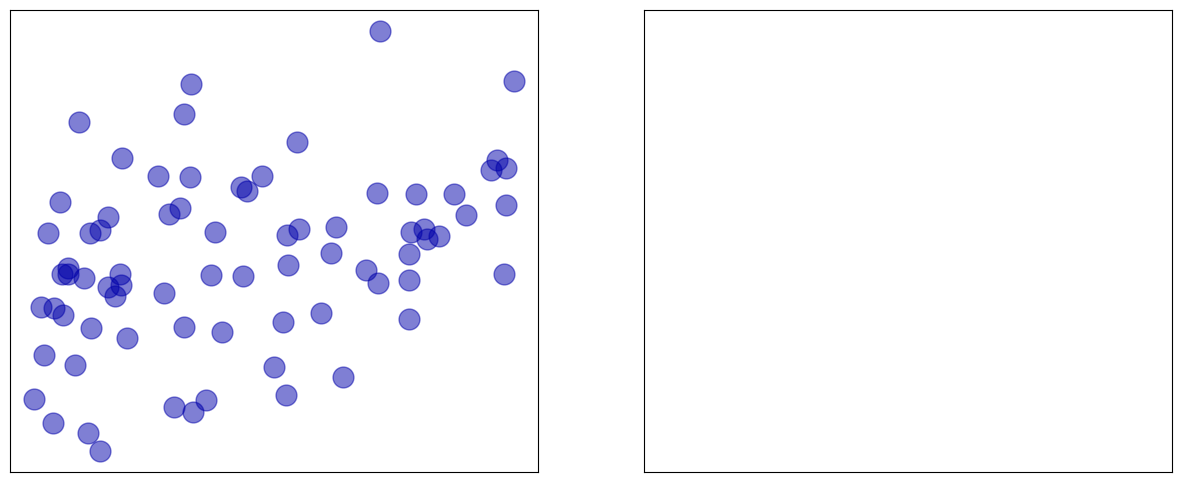

In [25]:
# Example adapted from Andreas Mueller
from sklearn.ensemble import GradientBoostingRegressor

# Make some toy data
def make_poly(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (x) ** 3
    y = (y_no_noise + rnd.normal(scale=3, size=len(x))) / 2
    return x.reshape(-1, 1), y
Xp, yp = make_poly()

# Train gradient booster and get predictions
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, random_state=0)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=61, learning_rate=.3, random_state=0).fit(Xp_train, yp_train)
gbrt.score(Xp_test, yp_test)

line = np.linspace(Xp.min(), Xp.max(), 1000)
preds = list(gbrt.staged_predict(line[:, np.newaxis]))
preds_train = [np.zeros(len(yp_train))] + list(gbrt.staged_predict(Xp_train))

# Plot
def plot_gradient_boosting_step(step, axes):
    axes[0].plot(Xp_train[:, 0], yp_train - preds_train[step], 'o', alpha=0.5, markersize=10*fig_scale)
    axes[0].plot(line, gbrt.estimators_[step, 0].predict(line[:, np.newaxis]), linestyle='-', lw=3*fig_scale)
    axes[0].plot(line, [0]*len(line), c='k', linestyle='-', lw=1*fig_scale)
    axes[1].plot(Xp_train[:, 0], yp_train, 'o',  alpha=0.5, markersize=10*fig_scale)
    axes[1].plot(line, preds[step], linestyle='-', lw=3*fig_scale)
    axes[1].vlines(Xp_train[:, 0], yp_train, preds_train[step+1])

    axes[0].set_title("Residual prediction step {}".format(step + 1), fontsize=9)
    axes[1].set_title("Total prediction step {}".format(step + 1), fontsize=9)
    axes[0].set_ylim(yp.min(), yp.max())
    axes[1].set_ylim(yp.min(), yp.max())
    plt.tight_layout();

@interact
def plot_gradient_boosting(step = (0, 60, 1)):
    fig, axes = plt.subplots(1, 2, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(10*fig_scale, 4*fig_scale))
    plot_gradient_boosting_step(step, axes)


### Algorithme de boosting de gradient (classification)

* Les modèles de base sont des arbres de _régression_, qui prédisent la probabilité d'une classe positive $p$.
    * Pour les problèmes multi-classes, former un arbre par classe
* Utiliser la perte logarithmique (binaire), avec la vraie classe $y_i \in {0,1}$ : $\mathcal{L_{log}} = - \sum_{i=1}^{N} \big[ y_i log(p_i) + (1-y_i) log(1-p_i) \big] $
* Les pseudo-résidus sont simplement la différence entre la classe réelle et la classe prédite $p$ :
$$\frac{\partial \mathcal{L}}{\partial \hat{y}} = \frac{\partial \mathcal{L}}{\partial log(p_i)} = y_i - p_i$$ * Les pseudo-résidus sont simplement la différence entre la classe réelle et la classe prédite $p$.
* Le modèle initial $g_0$ prédit $p = log(\frac{\#positives}{\#négatives})$ 
* Pour l'itération $m=1..M$ :
    * Pour tous les échantillons i=1..n, calculer les pseudo-résidus $r_i = y_i - p_i$.
    * Ajuster un nouveau modèle d'arbre de régression $g_m(\mathbf{x})$ à $r_{i}$.
        * Dans $g_m(\mathbf{x})$, chaque feuille prédit $\frac{\sum_{i} r_i}{\sum_{i} p_i(1-p_i)}$.
    * Mise à jour des prédictions d'ensemble $\hat{y} = g_0(\mathbf{x}) + \sum_{m=1}^M \eta \cdot g_m(\mathbf{x})$
* Arrêt anticipé (optionnel) : arrêt lorsque la performance sur l'ensemble de validation ne s'améliore pas pour $nr$ itérations

#### La classification par boosting du gradient en action
* La taille des échantillons représente les poids résiduels : la plupart tombent rapidement à (presque) zéro.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, random_state=0)
gbct = GradientBoostingClassifier(max_depth=2, n_estimators=60, learning_rate=.3, random_state=0).fit(Xa_train, ya_train)
gbct.score(Xa_test, ya_test)
preds_train_cl = [np.zeros(len(ya_train))] + list(gbct.staged_predict_proba(Xa_train))
current_gb_ax = None
weight_scale = 1

def plot_gb_decision_boundary(gbmodel, step, X, y, N = 10, scatter_weights = np.ones(len(y)) , ax = None, title = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

    # Get current axis and plot
    if ax is None:
        ax = plt.gca()
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40, edgecolors='none')
    ax.set_xticks(())
    ax.set_yticks(())
    if title:
        ax.set_title(title, pad='0.5')
    
    # Plot classifier background
    if gbmodel is not None:
        xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))
        zz = np.array( [list(gbmodel.staged_predict_proba(np.array([xi,yi]).reshape(1,-1)))[step][:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
        Z = zz.reshape(xx.shape)
        ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5, levels=[0,0.5,1])


@interact
def plot_gboost(iteration=(1,60,1)):
    pseudo_residuals = np.abs(ya_train - preds_train_cl[iteration][:,1])
    title = "Base model {}, error: {:.2f}".format(iteration,np.sum(pseudo_residuals))
    plot_gb_decision_boundary(gbct, (iteration-1), Xa_train, ya_train, N = 20, scatter_weights =pseudo_residuals * weight_scale, ax=current_gb_ax, title=title ) 
        

interactive(children=(IntSlider(value=30, description='iteration', max=60, min=1), Output()), _dom_classes=('w…

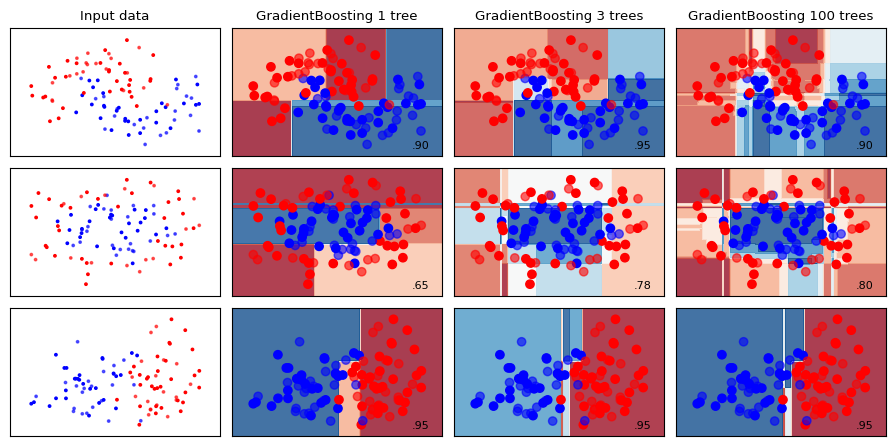

In [27]:
names = ["GradientBoosting 1 tree", "GradientBoosting 3 trees", "GradientBoosting 100 trees"]

classifiers = [
    GradientBoostingClassifier(n_estimators=1, random_state=0, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=3, random_state=0, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.5)
    ]

mglearn.plots.plot_classifiers(names, classifiers, figuresize=(6*fig_scale,3*fig_scale))  

#### Analyse biais-variance
* Gradient Boosting est très efficace pour réduire les erreurs de biais
* Trop booster finira par augmenter la variance

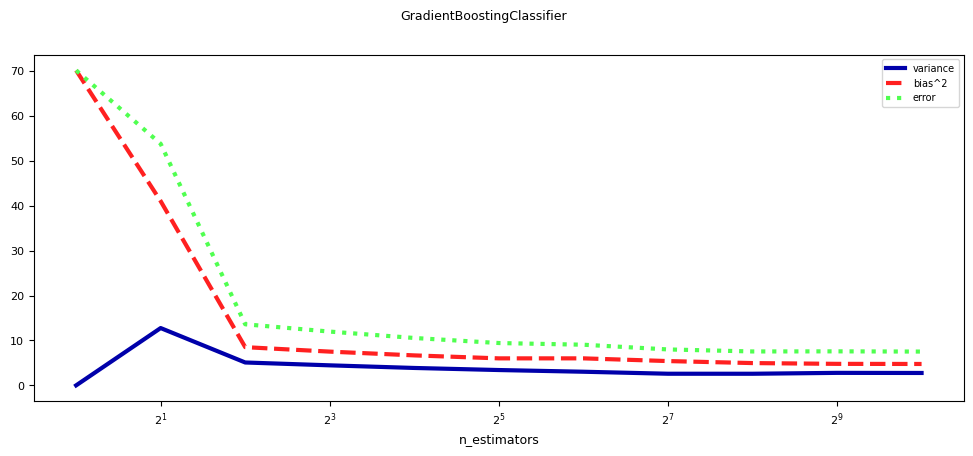

In [28]:
# Note: I tried if HistGradientBoostingClassifier is faster. It's not.
# We're training many small models here and the thread spawning likely causes too much overhead
plot_bias_variance_rf(GradientBoostingClassifier, cancer.data, cancer.target, warm_start=True)

#### Importance des caractéristiques
* Le Gradient Boosting fournit également des importances de caractéristiques, basées sur de nombreux arbres.
* Par rapport à RandomForests, les arbres sont plus petits, donc plus de caractéristiques ont une importance nulle.

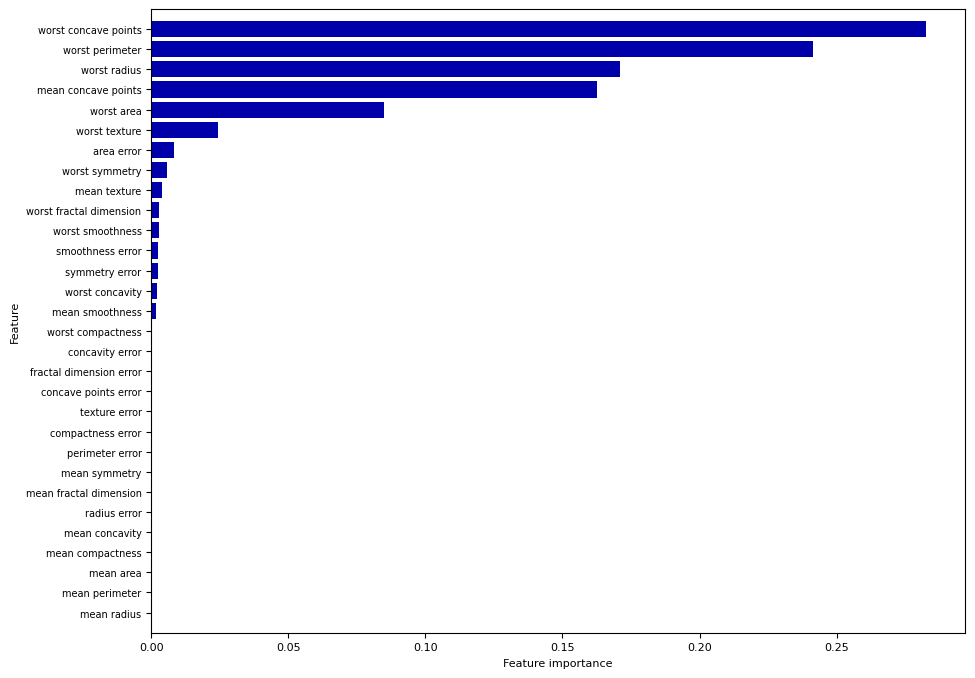

In [29]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(Xc_train, yc_train)
plot_feature_importances_cancer(gbrt)

#### Gradient Boosting : forces et faiblesses
* Parmi les modèles les plus puissants et les plus utilisés
* Fonctionne bien sur des fonctionnalités hétérogènes et à différentes échelles
* Généralement meilleur que les forêts aléatoires, mais nécessite plus de réglages et une formation plus longue.
* Ne fonctionne pas bien sur les données clairsemées de grande dimension

Principaux hyperparamètres :

* `n_estimators` : plus c'est haut, mieux c'est, mais cela commencera à surapprendre
* `learning_rate` : des taux plus bas signifient que davantage d'arbres sont nécessaires pour obtenir des modèles plus complexes
     * Réglez `n_estimators` aussi haut que possible, puis réglez `learning_rate`
     * Ou choisissez un « learning_rate » et utilisez un arrêt anticipé pour éviter le surapprentissage
* `max_degree` : généralement maintenu faible (<5), réduit en cas de surapprentissage
* `max_features` : peut également être ajusté, comme pour les forêts aléatoires
* `n_iter_no_change` : arrêt anticipé : l'algorithme s'arrête si l'amélioration est inférieure à une certaine tolérance `tol` pendant plus d'itérations `n_iter_no_change`.

### Boosting de Gradient Extrême (XGBoost)

- Version plus rapide du gradient boosting : permet plus d'itérations sur des ensembles de données plus volumineux
- Arbres de régression normaux : divisés pour minimiser la perte carrée des prédictions de feuilles
     - Les arbres XGBoost ne s'adaptent qu'aux résidus : divisés pour que les résidus dans la feuille soient plus _similaires_
- N'évaluez pas chaque point de separation, seulement $q$ _quantiles_ par variable (binning)
     - $q$ est un hyperparamètre (`sketch_eps`, par défaut 0,03)
- Pour les grands ensembles de données, XGBoost utilise des _quantiles approximatifs_
     - Peut être parallélisé (multicœur) en découpant les données et en combinant des histogrammes de données
     - Pour la classification, les quantiles sont pondérés par $p(1-p)$
- Descente de gradient accélérée en utilisant la dérivée seconde de la fonction de perte
- Forte régularisation par pré-elagage des arbres
- Les colonnes et les lignes sont sous-échantillonnées de manière aléatoire lors du calcul des divisions
- Prise en charge du calcul hors cœur (compression des données en RAM, sharding,...)

#### XGBoost en pratique
* Ne fait pas partie de scikit-learn, mais `HistGradientBoostingClassifier` est similaire
     * binning, multicœur,...
* Le package python `xgboost` est compatible avec Sklearn
     * Installer séparément, `conda install -c conda-forge xgboost`
     * Permet le tracé de la courbe d'apprentissage et le démarrage à chaud
* Lectures complémentaires :
     * [Documentation XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster)
     * [Papier](http://arxiv.org/abs/1603.02754)
     * [Vidéo](https://www.youtube.com/watch?v=oRrKeUCEbq8)

### LightGBM
Une autre technique de boosting rapide

* Utilise l'échantillonnage basé sur les gradients
    - utilise toutes les instances avec des gradients/résidus importants (par exemple, 10% les plus importants) 
    - échantillonner aléatoirement les instances avec de petits gradients, ignorer le reste
    - intuition : les échantillons avec de petits gradients sont déjà bien entraînés.
    - nécessite un critère de gain d'information adapté
* codage plus intelligent des caractéristiques catégorielles

### CatBoost
Une autre technique de boosting rapide

* Optimisée pour les variables catégorielles
    * Utilise une version lissée de l'encodage de la cible
* Utilise des arbres symétriques : même division pour tous les nœuds d'un niveau donné 
    * Peut être beaucoup plus rapide
* Permet des contraintes de monotonicité pour les caractéristiques numériques
    * Le modèle doit être une fonction non décroissante de ces caractéristiques.
* Beaucoup d'outils (par exemple, entrainement sur GPU)

## Statcking

- Choisir $M$ modèles de base différents, générer des prédictions
- Empiler (méta-modèle) apprend la correspondance entre les prédictions et l'étiquette correcte
    - Peut également être répété : empilage à plusieurs niveaux
    - Empileurs populaires : modèles linéaires (rapides) et gradient boosting (précis)
- Empilement en cascade : ajoute les prédictions du modèle de base en tant que caractéristiques supplémentaires.
- Les modèles doivent être suffisamment différents, être experts dans différentes parties des données.
- Peut être _très_ précis, mais aussi très lent à prédire
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/stacking.png" alt="ml" style="width : 500px ;"/>

## Autres techniques ensemblistes

- Hyper-ensembles : même modèle de base mais avec des configurations hyperparamétriques différentes
    - Peuvent combiner des modèles surentraines et sous-entraines
- Ensembles profonds : ensembles de modèles d'apprentissage profond
- Classificateur optimal de Bayes : ensemble de tous les modèles possibles (largement théorique)
- Moyenne des modèles bayésiens : moyenne pondérée des modèles probabilistes, pondérée par leurs probabilités a posteriori.
- Sélection par validation croisée : effectue une validation croisée interne pour sélectionner le meilleur des $M$ modèles.
- Toute combinaison de différentes techniques ensemblistes

In [30]:
%%HTML
<style>
td {font-size: 20px}
th {font-size: 20px}
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 20px;
}
</style>

### Apercu des Algorithmes

| Name | Representation | Loss function | Optimization | Regularization |
|---|---|---|---|---|
| Classification trees | Decision tree | Entropy / Gini index | Hunt's algorithm | Tree depth,... |
| Regression trees | Decision tree | Square loss | Hunt's algorithm | Tree depth,... |
| RandomForest | Ensemble of randomized trees | Entropy / Gini / Square | (Bagging) |  Number/depth of trees,... |
| AdaBoost | Ensemble of stumps | Exponential loss | Greedy search |  Number/depth of trees,... |
| GradientBoostingRegression | Ensemble of regression trees | Square loss | Gradient descent |  Number/depth of trees,... |
| GradientBoostingClassification | Ensemble of regression trees | Log loss | Gradient descent |  Number/depth of trees,... |
| XGBoost, LightGBM, CatBoost | Ensemble of XGBoost trees | Square/log loss | 2nd order gradients |  Number/depth of trees,... |
| Stacking | Ensemble of heterogeneous models | / | / |  Number of models,... |

### Résumé
- Les ensembles de classificateurs de vote améliorent les performances
    - Quels modèles choisir ? Tenez compte des compromis biais-variance !
- Le Bagging / RandomForest est une technique de réduction de la variance
    - Construire de nombreux modèles à haute variance (surapprentissage) sur des échantillons de données aléatoires.
        - Plus les modèles sont différents, mieux c'est
    - L'agrégation (soft voting) de nombreux modèles réduit la variance.
        - Rendements décroissants, un lissage excessif peut augmenter l'erreur de biais.
    - Le parallélisme est facile, il ne nécessite pas beaucoup de réglages.
- Le boosting est une technique de réduction des biais
    - Construire des modèles à faible variance qui corrigent les erreurs des autres.
        - En repondérant les échantillons mal classés : AdaBoost
        - En prédisant l'erreur résiduelle : Gradient Boosting
    - Modèles additifs : les prédictions sont la somme des prédictions du modèle de base.
        - Peut ramener l'erreur à zéro, mais risque de surapprentissage
    - Ne se parallélise pas facilement. Plus lent à former, beaucoup plus rapide à prédire.
        - XGBoost, LightGBM,... sont rapides et offrent une certaine parallélisation.
- Stacking : apprendre à combiner les prédictions des modèles de base
    - Les modèles de base doivent toujours être suffisamment différents.